In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import time
import pickle 

In [3]:
file_path = "/Users/tiendat/Desktop/DW_final_dataset/scaled_with_label.csv"
data = pd.read_csv(file_path)

In [5]:
X = data.drop('Attrition', axis=1)  # Các đặc trưng
y = data['Attrition']  # Nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()
# Khởi tạo và huấn luyện mô hình Random Forest với 100 cây tree
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()
pickle.dump(model, open('/Users/tiendat/Desktop/DW_final/random_pca.pkl', 'wb'))
#Kết quả thời gian khởi tạo và huấn luyện
print(f"Start time: {start_time} - End time: {end_time}")
print("Time",end_time-start_time)
X.columns.value_counts().sum()

Start time: 1734927192.739118 - End time: 1734927193.0966332
Time 0.3575150966644287


34

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       260
           1       0.88      0.79      0.84       160

    accuracy                           0.88       420
   macro avg       0.88      0.86      0.87       420
weighted avg       0.88      0.88      0.88       420



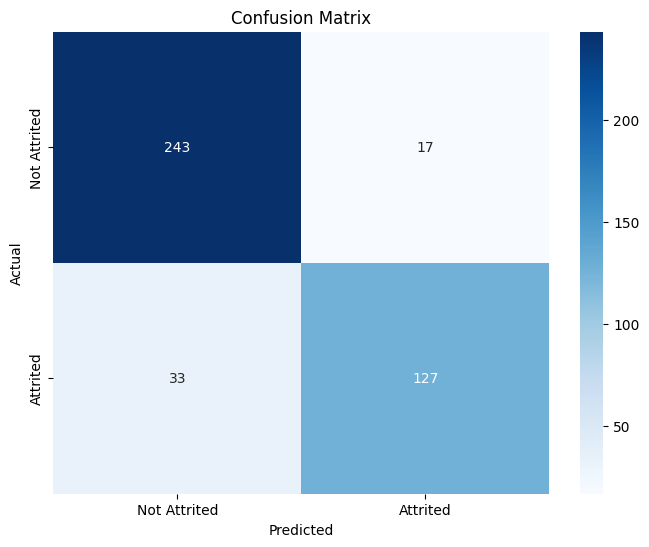

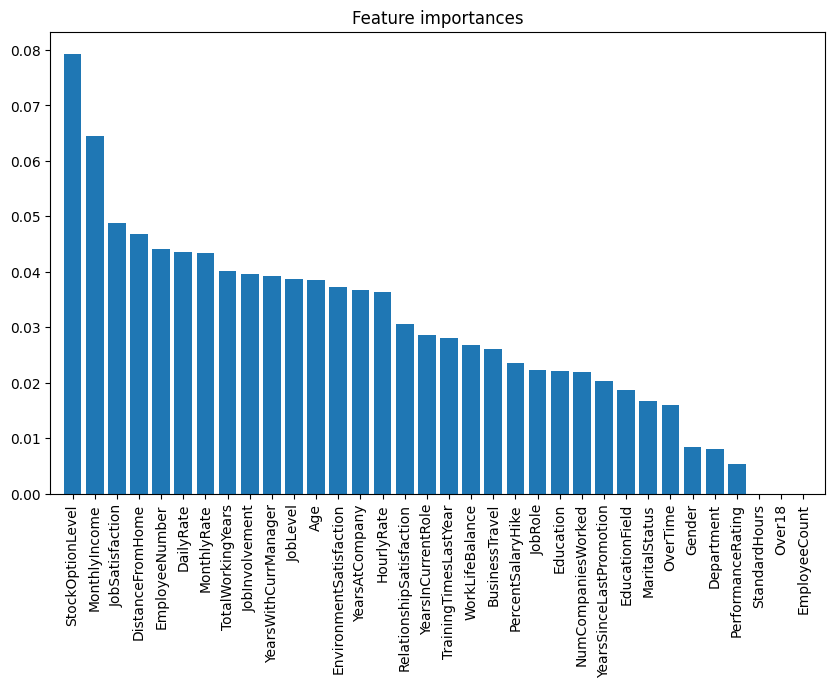

In [ ]:
y_pred = model.predict(X_test)
# Báo cáo phân loại
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#tính độ quan trọng đặc trưng
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

plt.show()

